# ETF Analaysis 

## Convert Everything in Piyush code to Object Oriented Programming Code

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from scipy.stats import norm
import numpy as np
import os
import time

##### ETF Data Clean up ###########

class ETFDataCleanup(object):
    
    def __init__(self):
        pass

    def showNaColumns(self,df):
        s=df.isnull().sum()
        print(s[s>0])
    
    def dropNAColumns(self,df):
        return df.dropna(axis='columns')
    
    def computeDailyReturns(self,df):
        return df.pct_change().dropna()        
    
    
####### Get Data for Constituents of ETF

class ConstituentsData(ETFDataCleanup):
    
    def __init__(self,fileName=None,startdate=None,enddate=None):
        self.fileName=fileName
        self.startdate=startdate
        self.enddate=enddate
        self.constituentdata=[]
        self.constituentcloseDF=[]
        self.tickerdf=[]
        self.changeDF=[]
        self.waDF=[]
    
    def getconstituentdata(self):
        self.tickerdf = pd.read_excel(self.fileName)
        tickers=self.tickerdf['Ticker']
        self.tickerdf.set_index('Ticker',inplace=True)
        self.constituentdata =  web.DataReader(tickers,'yahoo',self.startdate,self.enddate)
        self.constituentcloseDF = self.constituentdata['Close'].iloc[:, :]
        
    def stringWeightsToFloat(self):
        self.tickerdf['Weights']=self.tickerdf['Weights'].apply(lambda x: x.replace('%','')).astype(float)
    
    def findNetAssetValue(self):
        self.waDF=self.changeDF
        for col in self.changeDF.columns:
            self.waDF[col]=self.changeDF[col]*self.tickerdf['Weights'].loc[col]
        self.waDF['NAV']=self.waDF.sum(axis=1)/100

####### Get prices of ETF        
class ETFStockPrices(ETFDataCleanup):
    
    def __init__(self,etfticker=None,startdate=None,enddate=None):
        self.etfticker=etfticker
        self.startdate=startdate
        self.enddate=enddate
        self.etfdata=[]
        self.etfchangeDF=[]

        
    def getETFTickerData(self):
        self.etfdata =  web.DataReader(self.etfticker,'yahoo',self.startdate,self.enddate)
 


class ETFArbitrage(object):

    def __init__(self,etfob,waDF):
        self.navDF=pd.merge(etfob,waDF['NAV'],left_index=True,right_index=True)
        self.navDF['Date']=self.navDF.index
        self.difDF=[]
    
    def scatterplot(self):
        plt.scatter(self.navDF['Close'],self.navDF['NAV'])
        
    def scatterplot2(self):
        #change figure size for the plot
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0]=12
        fig_size[1]=6
        plt.rcParams["figure.figsize"]=fig_size

        self.difDF=(self.navDF['Close']-self.navDF['NAV'])*100
        plt.scatter(self.navDF['Date'],self.difDF)
    
    def seaborndist(self):
        sns.distplot(self.difDF.values, hist=True, kde=True, 
             bins='auto', color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

## Handle

In [2]:
def mainhandle(filename,startdate,enddate,tickeretf):
    ob=ConstituentsData(fileName=filename,startdate=startdate,enddate=enddate)
    ob.getconstituentdata()
    print(tickeretf)
    print("Tickers with NA Values")
    ob.showNaColumns(ob.constituentcloseDF)
    ob.constituentcloseDF=ob.dropNAColumns(ob.constituentcloseDF)
    print("***************")
    print("Check for NA Values again")
    ob.showNaColumns(ob.constituentcloseDF)
    ob.changeDF=ob.computeDailyReturns(ob.constituentcloseDF)
    ob.stringWeightsToFloat()
    ob.findNetAssetValue()

    print("***************")
    print("Data for Constituents")
    print(ob.waDF.head(5))

    etfob=ETFStockPrices(etfticker=tickeretf,startdate=dt.datetime(2019,1,1),enddate=dt.datetime(2020,1,22))
    etfob.getETFTickerData()
    print("Show Any Empty Values")
    etfob.showNaColumns(etfob.etfdata)
    etfob.etfchangeDF=etfob.computeDailyReturns(etfob.etfdata['Close'])

    print("***************")
    print("Data for ETF stock prices")
    print(etfob.etfchangeDF.head(5))

    print("****************")
    print("Charts")
    arbob=ETFArbitrage(etfob.etfchangeDF,ob.waDF)
    arbob.scatterplot()
    plt.show()
    arbob.scatterplot2()
    plt.show()
    arbob.seaborndist()
    plt.show()

# Analayze all ETFs together

/anaconda3/lib/python3.6/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'AMD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


XLK
Tickers with NA Values
Symbols
AMD     267
NLOK     64
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols         AAPL       ACN      ADBE       ADI       ADP       ADS  \
Date                                                                     
2019-01-03 -2.009081 -0.068625 -0.101904 -0.039867 -0.035030 -0.001771   
2019-01-04  0.861043  0.078156  0.125472  0.016024  0.046231  0.004738   
2019-01-07 -0.044895  0.006982  0.035017  0.004150 -0.006276 -0.000004   
2019-01-08  0.384503  0.050832  0.038487  0.016101  0.006843  0.001217   
2019-01-09  0.342522  0.010109  0.030493  0.016725  0.001060  0.001532   

Symbols         ADSK      AKAM      AMAT      ANET  ...       TEL       TXN  \
Date                                                ...                       
2019-01-03 -0.036388 -0.005106 -0.050412 -0.010401  ... -0.018674 -0.109100   
2019-01-04  0.034828  0.006697  0.059581  0.002876  ...  0.013116  

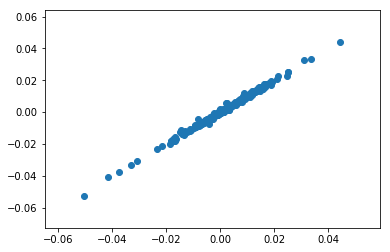

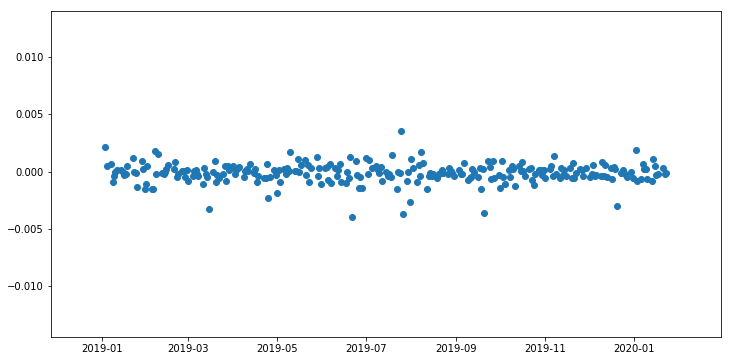

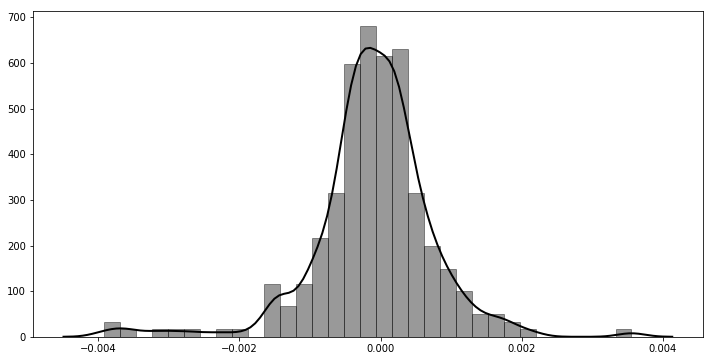

XLI
Tickers with NA Values
Symbols
SNA    4
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          AAL       ALK      ALLE       AME       AOS      ARNC  \
Date                                                                     
2019-01-03 -0.032038 -0.018238 -0.008114 -0.026173 -0.006039 -0.003152   
2019-01-04  0.028323  0.010674 -0.001084  0.034796  0.010019  0.012941   
2019-01-07  0.012213  0.000660  0.005011 -0.001487  0.004476  0.010680   
2019-01-08 -0.006917  0.002909  0.006633  0.013541  0.006123  0.001391   
2019-01-09  0.013263  0.008325  0.005363  0.006139  0.003478  0.001156   

Symbols           BA       CAT      CHRW       CMI  ...       UAL       UNP  \
Date                                                ...                       
2019-01-03 -0.277489 -0.120613 -0.015857 -0.020585  ... -0.035752 -0.192111   
2019-01-04  0.362215  0.171041  0.014904  0.043194  ...  0.024120  0.199886   
201

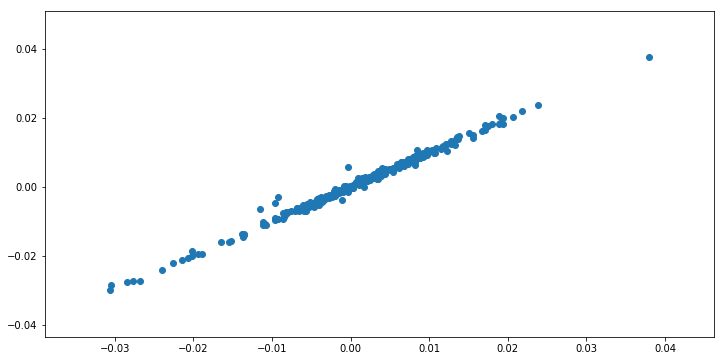

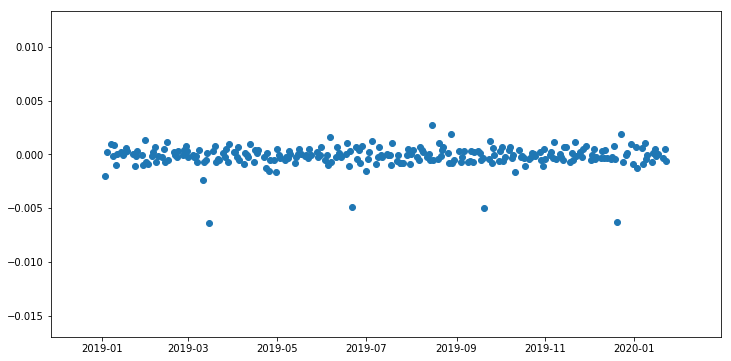

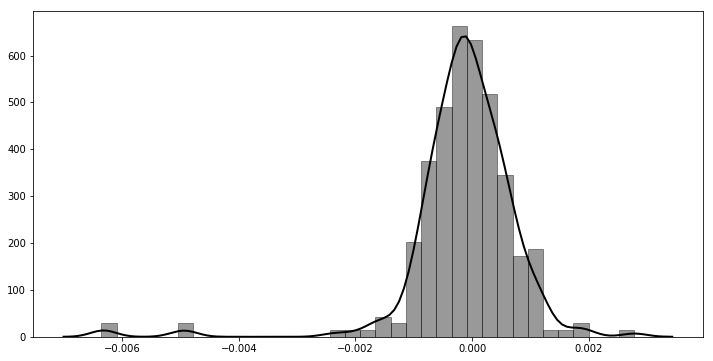

XLY
Tickers with NA Values
Series([], dtype: int64)
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          AAP      AMZN      APTV       AZO       BBY      BKNG  \
Date                                                                     
2019-01-03  0.012800 -0.598224 -0.011580  0.009484 -0.017239 -0.115343   
2019-01-04 -0.010171  1.186516  0.035319 -0.013179  0.004000  0.110947   
2019-01-07  0.006015  0.814175  0.014716 -0.017839  0.047932 -0.011310   
2019-01-08 -0.002850  0.393712  0.052490 -0.014914  0.024706 -0.049310   
2019-01-09  0.011299  0.040632  0.036623  0.012410  0.006293 -0.075219   

Symbols          BWA       CCL       CMG      CPRI  ...       TPR      TSCO  \
Date                                                ...                       
2019-01-03 -0.009957 -0.039302 -0.008113 -0.010444  ... -0.012523 -0.008671   
2019-01-04  0.012398  0.044695  0.032554  0.010905  ...  0.011735  0.009465   
2019-01-

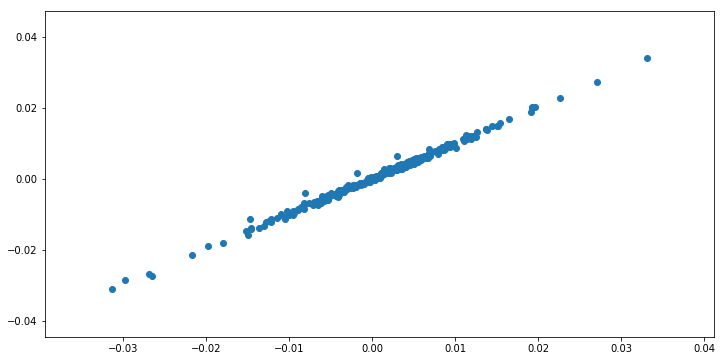

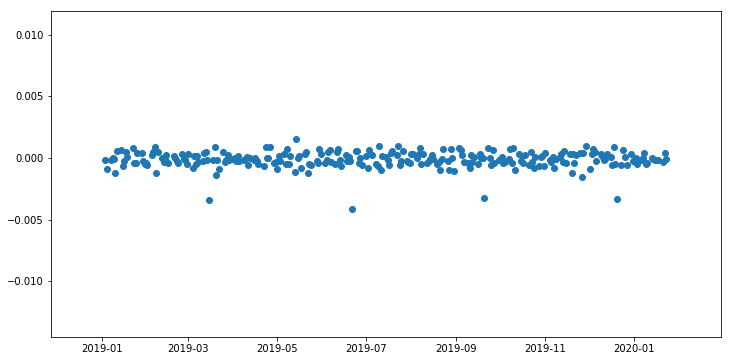

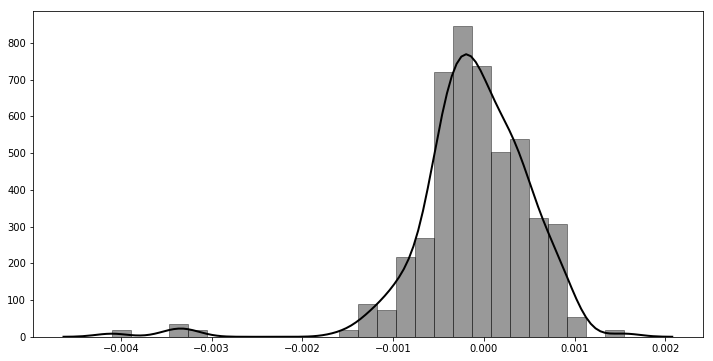

XLRE
Tickers with NA Values
Series([], dtype: int64)
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          AIV       AMT       ARE       AVB       BXP      CBRE  \
Date                                                                     
2019-01-03  0.008649  0.077902  0.020569  0.017872  0.010620 -0.128234   
2019-01-04  0.003476  0.051901  0.025501  0.026682  0.043682  0.103341   
2019-01-07  0.000693  0.080413  0.015365 -0.010598  0.015819  0.035630   
2019-01-08  0.027231  0.146789  0.057811  0.078381  0.074560  0.082182   
2019-01-09  0.001797 -0.113700  0.010873  0.032538  0.041662  0.017616   

Symbols          CCI       DLR       DRE      EQIX  ...       REG      SBAC  \
Date                                                ...                       
2019-01-03  0.038519 -0.016680  0.001965 -0.072268  ...  0.001859  0.039196   
2019-01-04  0.114979  0.068992  0.022896  0.141370  ...  0.004873  0.008663   
2019-01

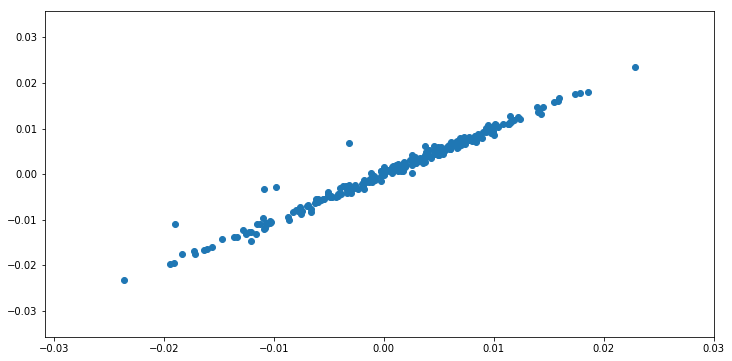

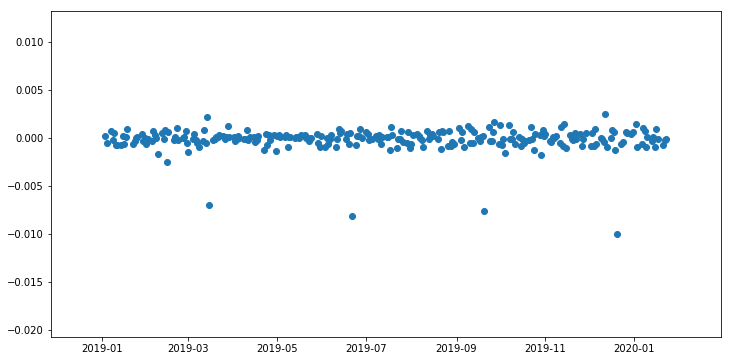

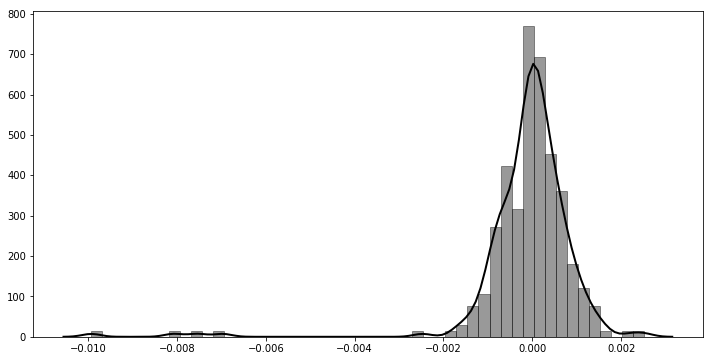

XLU
Tickers with NA Values
Series([], dtype: int64)
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          AEE       AEP       AES       ATO       AWK       CMS  \
Date                                                                     
2019-01-03  0.005339 -0.012516 -0.001023  0.011352  0.010370  0.003819   
2019-01-04  0.029958  0.049443  0.048095  0.019220  0.019772  0.019060   
2019-01-07 -0.024289 -0.029980  0.006933 -0.010961 -0.027826 -0.010491   
2019-01-08  0.033535  0.066178  0.033515  0.019611  0.038485  0.030792   
2019-01-09 -0.015689 -0.040676 -0.002890 -0.024564 -0.033553 -0.019532   

Symbols          CNP         D       DTE       DUK  ...        NI       NRG  \
Date                                                ...                       
2019-01-03  0.008114 -0.035109  0.011387 -0.002642  ...  0.001388 -0.009635   
2019-01-04  0.026222  0.142145  0.041577  0.061675  ...  0.020335  0.034856   
2019-01-

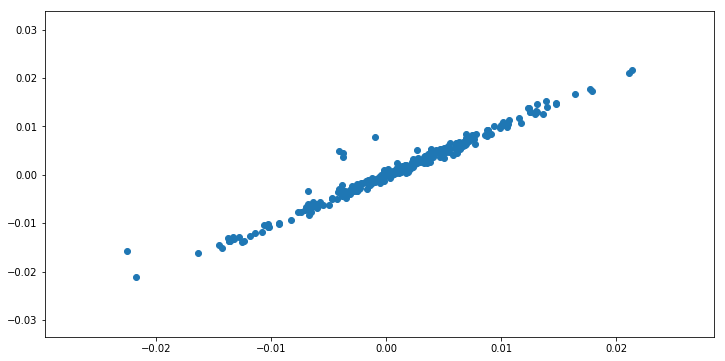

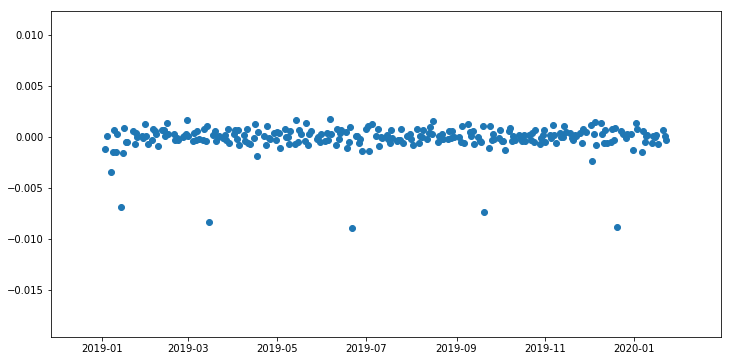

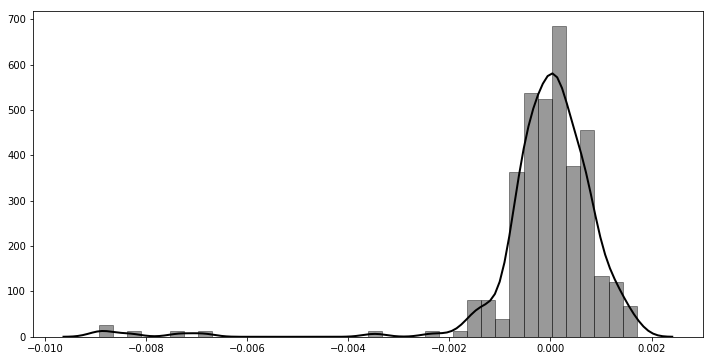

XLB
Tickers with NA Values
Symbols
CTVA    99
DOW     53
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          ALB      AMCR       APD       AVY       BLL        CE  \
Date                                                                     
2019-01-03 -0.087431  0.000000 -0.208918 -0.051268 -0.031482 -0.073749   
2019-01-04  0.061535  0.000000  0.315994  0.061335  0.103071  0.082290   
2019-01-07  0.005619  0.053333 -0.080981  0.007511  0.063950  0.018994   
2019-01-08  0.012340 -0.015663 -0.089624  0.016169  0.034714  0.028226   
2019-01-09 -0.007984  0.002627 -0.064059 -0.001377  0.013161  0.009279   

Symbols           CF        DD       ECL       EMN  ...       MOS       NEM  \
Date                                                ...                       
2019-01-03 -0.045158 -0.234844 -0.167694 -0.033527  ... -0.024517 -0.014095   
2019-01-04  0.108627  0.269309  0.260596  0.069657  ...  0.066826  0.

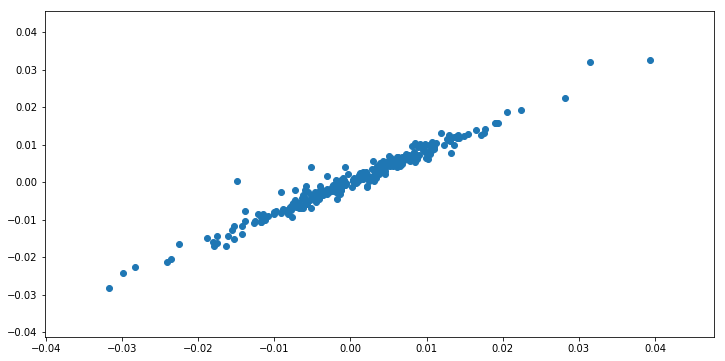

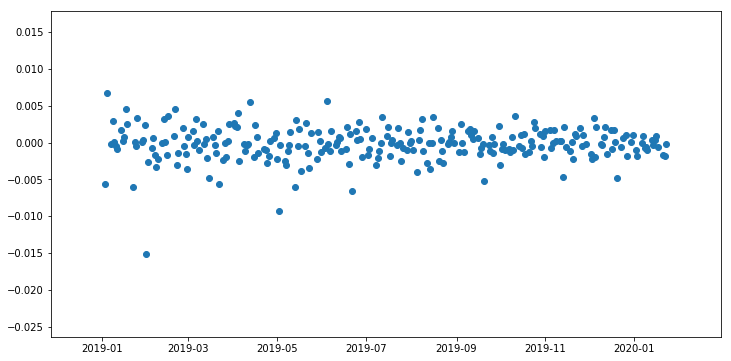

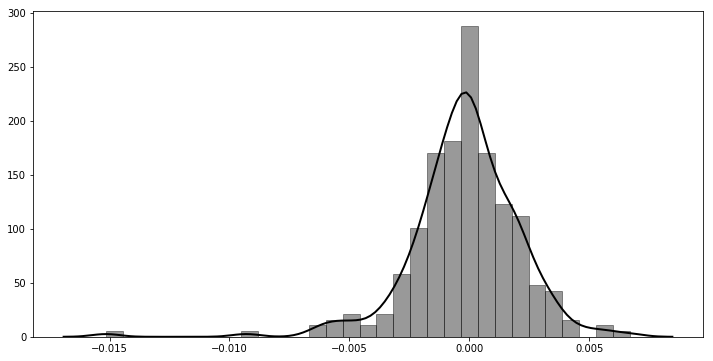

XLC
Tickers with NA Values
Symbols
CTL      3
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols         ATVI      CHTR     CMCSA       DIS     DISCA     DISCK  \
Date                                                                     
2019-01-03 -0.152335 -0.007656  0.034015 -0.098119 -0.003310  0.002870   
2019-01-04  0.171184  0.238539  0.146250  0.124932  0.010210  0.021951   
2019-01-07  0.120961 -0.018877 -0.045948  0.035102  0.008504  0.016386   
2019-01-08  0.130027 -0.011345  0.035442  0.031503  0.015254  0.023077   
2019-01-09  0.073832 -0.045941  0.041215  0.045436  0.000837  0.005429   

Symbols         DISH        EA        FB      GOOG  ...       NWS      NWSA  \
Date                                                ...                       
2019-01-03  0.023369 -0.080759 -0.574388 -0.335257  ... -0.002713 -0.006277   
2019-01-04  0.078849  0.283650  0.932394  0.633063  ...  0

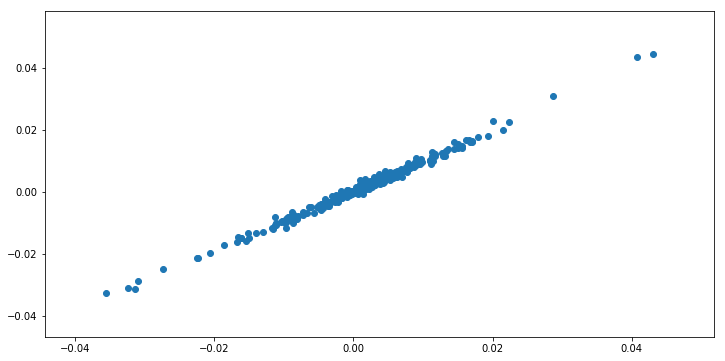

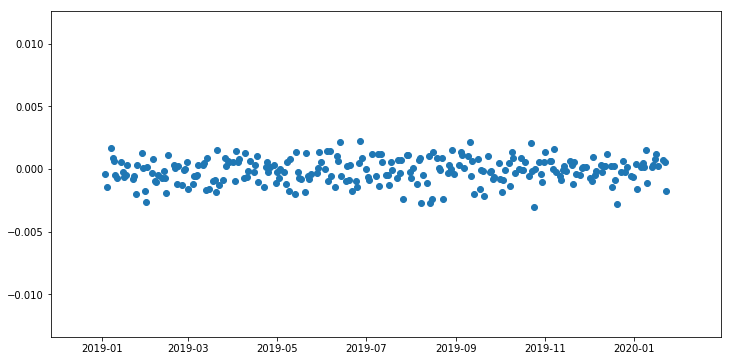

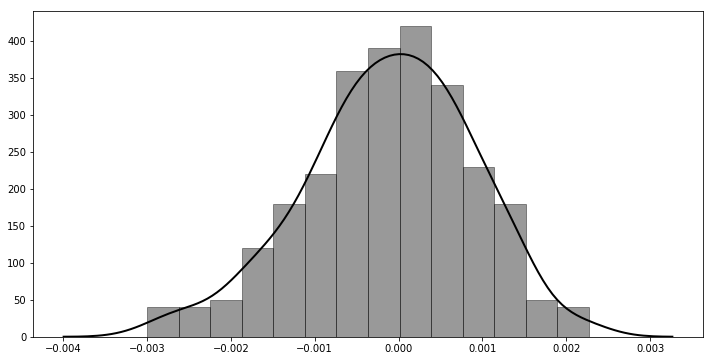

XLV
Tickers with NA Values
Symbols
COO    3
HCA    4
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols            A      ABBV       ABC      ABMD       ABT       AGN  \
Date                                                                     
2019-01-03 -0.026525 -0.106753 -0.005077 -0.005444 -0.197744  0.002265   
2019-01-04  0.024922  0.104383  0.004055  0.008115  0.119588  0.077387   
2019-01-07  0.015289  0.047289  0.002499  0.000955  0.062748 -0.001477   
2019-01-08  0.010555  0.015058  0.003746  0.002530 -0.050306  0.035939   
2019-01-09  0.015073 -0.106347  0.003567  0.012423  0.069936 -0.011126   

Symbols         ALGN      ALXN      AMGN      ANTM  ...       UHS       UNH  \
Date                                                ...                       
2019-01-03 -0.043753  0.013438 -0.053409 -0.050984  ... -0.003854 -0.198254   
2019-01-04  0.005327  0.035245  0.119984  0.011816  ...  0.006896  0.0850

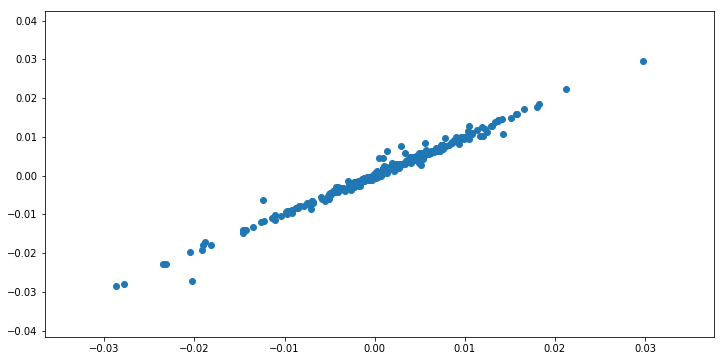

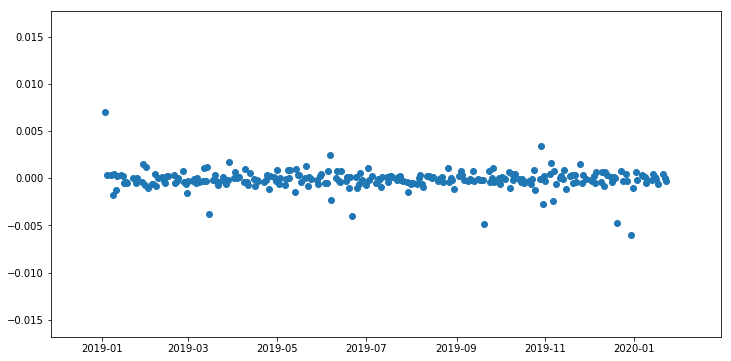

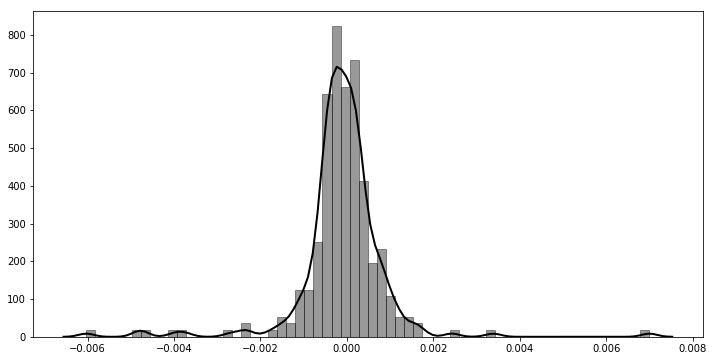

XLE
Tickers with NA Values
Series([], dtype: int64)
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          APA       BKR       COG       COP       CVX       CXO  \
Date                                                                     
2019-01-03  0.002944 -0.009976 -0.003825 -0.087283 -0.384584  0.002661   
2019-01-04  0.047815  0.075323 -0.006416  0.116399  0.416137  0.081890   
2019-01-07  0.024555  0.040301  0.024384 -0.020248  0.260921  0.043500   
2019-01-08  0.016944  0.043902  0.008725  0.061738 -0.087648  0.064320   
2019-01-09  0.058243 -0.002585 -0.014005  0.152663  0.269482  0.048793   

Symbols          DVN       EOG      FANG       FTI  ...       OKE       OXY  \
Date                                                ...                       
2019-01-03  0.012421 -0.033127  0.013327  0.001536  ... -0.007455 -0.046581   
2019-01-04  0.041518  0.205907  0.052927  0.040242  ...  0.136227  0.122240   
2019-01-

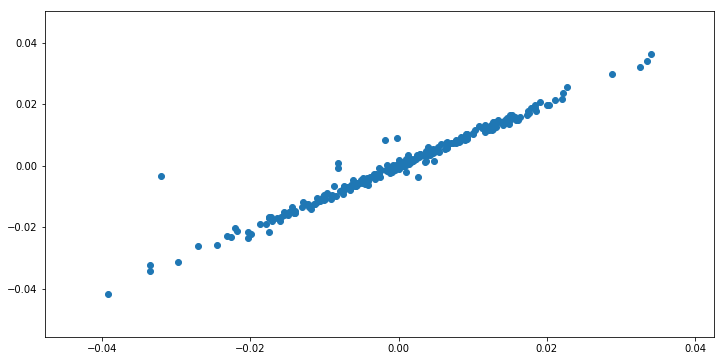

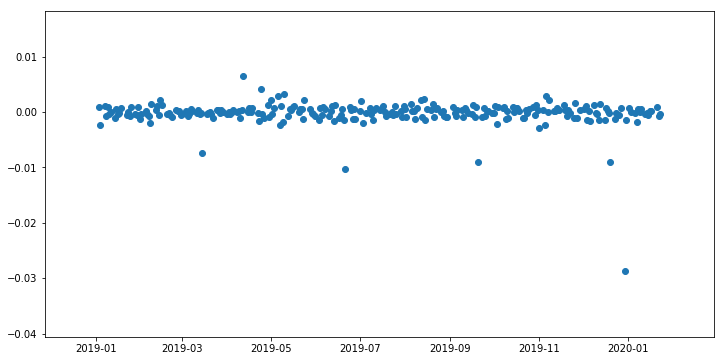

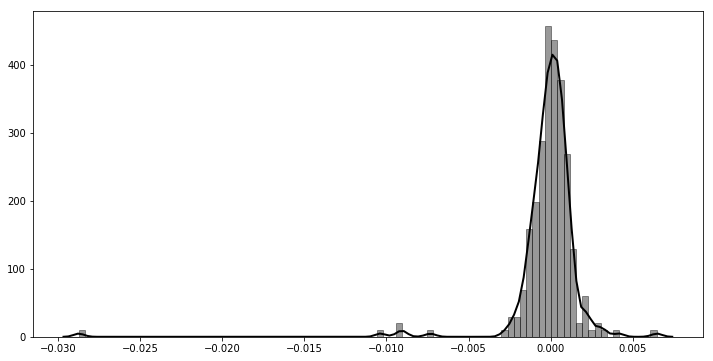

/anaconda3/lib/python3.6/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'BF.b', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


XLP
Tickers with NA Values
Symbols
BF.b    267
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          ADM       CAG       CHD        CL       CLX      COST  \
Date                                                                     
2019-01-03 -0.006374  0.009920 -0.002238 -0.016729  0.006967 -0.099619   
2019-01-04  0.033431  0.012802  0.012336  0.033017  0.007927  0.136484   
2019-01-07  0.007300  0.018939  0.012982  0.021411  0.013912  0.017320   
2019-01-08  0.026980 -0.035876 -0.002501  0.039609 -0.028253  0.035193   
2019-01-09  0.012564 -0.002575  0.001567  0.043848 -0.001548  0.030424   

Symbols         COTY       CPB        EL       GIS  ...        PG        PM  \
Date                                                ...                       
2019-01-03 -0.004144  0.005952 -0.127629  0.029820  ... -0.112463 -0.058163   
2019-01-04  0.009809  0.002645  0.090751  0.038660  ...  0.327383  0.210641   


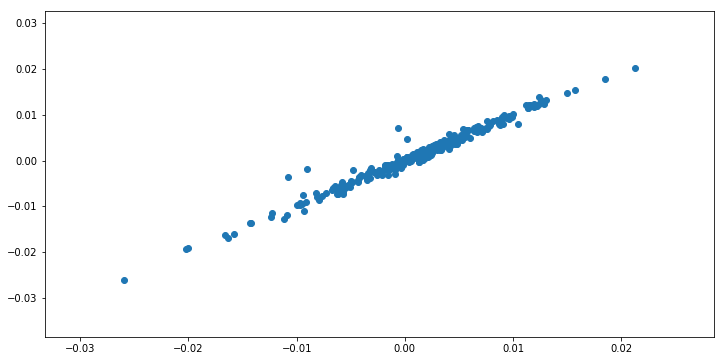

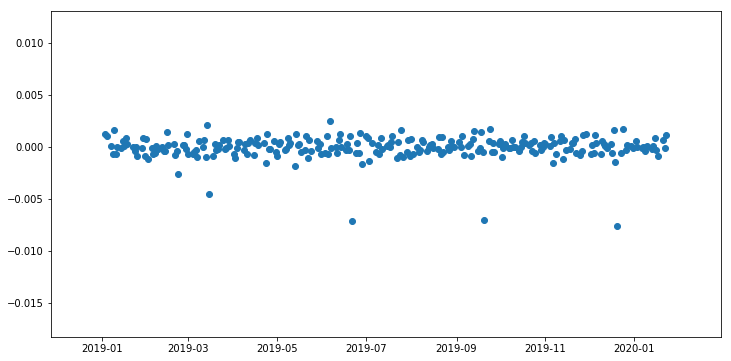

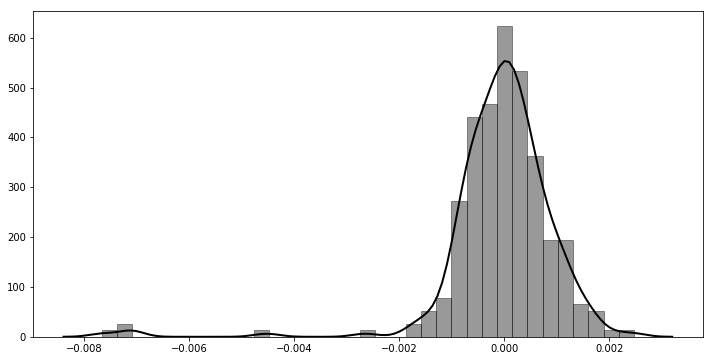

/anaconda3/lib/python3.6/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'BRK.b', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/anaconda3/lib/python3.6/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'CBOE.Z', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


XLF
Tickers with NA Values
Symbols
BRK.b     267
CBOE.Z    267
LNC         3
UNM         3
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          AFL       AIG       AIZ       AJG       ALL       AMP  \
Date                                                                     
2019-01-03 -0.028548 -0.028546 -0.003676 -0.009953 -0.018383 -0.016425   
2019-01-04  0.014007  0.047974  0.004644  0.013374  0.033056  0.033212   
2019-01-07  0.006037  0.007441  0.000915 -0.001539 -0.001761  0.002856   
2019-01-08  0.003503  0.005147  0.000279  0.002352 -0.000136  0.003901   
2019-01-09 -0.002494  0.018906  0.001417  0.006220  0.008550  0.006425   

Symbols          AON       AXP       BAC       BEN  ...       SYF       TFC  \
Date                                                ...                       
2019-01-03 -0.021894 -0.062317 -0.127404 -0.003869  ... -0.004227 -0.014733   
2019-01-04  0.027475  0.119410  0.3

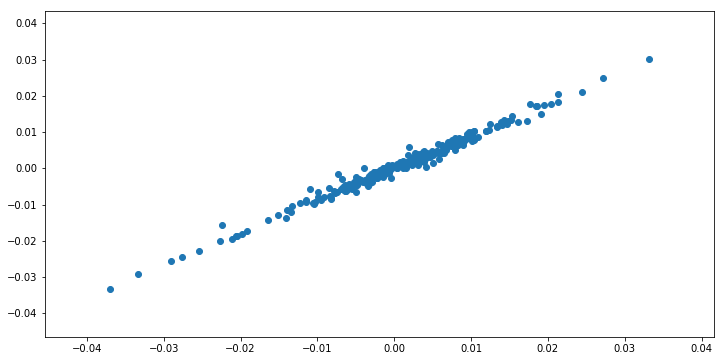

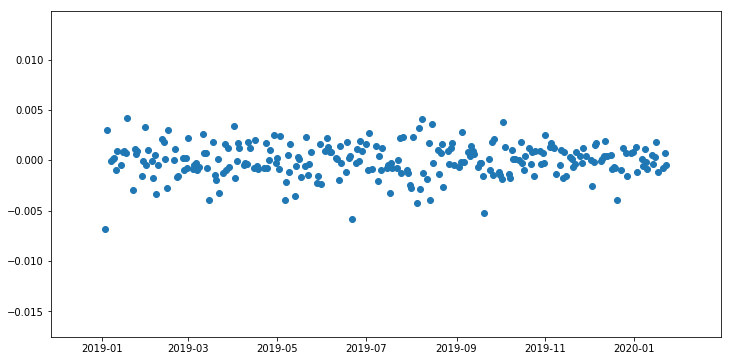

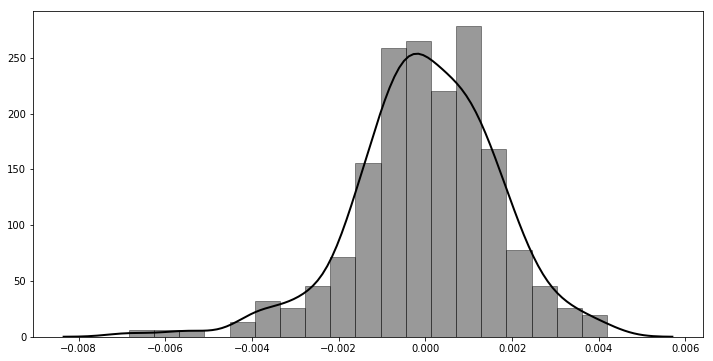

In [3]:
 
for filename in os.listdir(savingpath):
    if filename != '.DS_Store':
        tickeretf=filename.split('.')[0]
        mainhandle(savingpath+'/'+filename,dt.datetime(2019,1,1),dt.datetime(2020,1,22),tickeretf)
        time.sleep(4)